| <h1> Activity 4.1 </h1> | <h1>Advanced Data Analytics and Machine Learning</h1> |
|--- | --- |
Name: Escalicas, Peter Allen M.
Course and Section: CPE019S3
Date Submitted: 02/21/24
Instructor: Engr. Roman
Date Performed: 2/21/24
Date Submitted: 2/21/24

# **PART 1: Do the following objectives:**

**Part 1: Import the Libraries and Data**

In [ ]:
#code 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import IPython
import seaborn

titanic_test = '/content/titanic_test.csv'
testFrame = pd.read_csv(titanic_test)


titanic_train = '/content/titanic_train.csv'
trainFrame = pd.read_csv(titanic_train)



**Part 2: Plot the Data**

In [ ]:
#code 2
testFrame.describe()

trainFrame.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Part 3: Perform Simple Linear Regression on the SURVIVAL feature column**

In [ ]:
#code 3


# **PART 2: PDF File**

**Part 1: Create a Decision Tree Classifier**

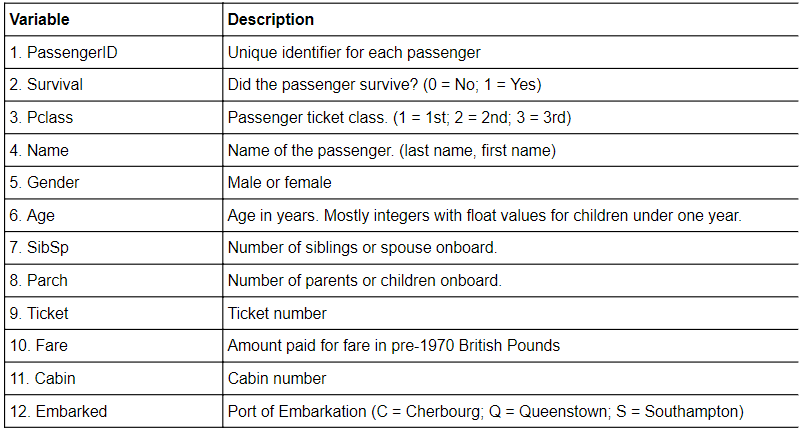

With the data above, what kinds of questions can we ask about the factors that contributed to passengers
surviving or perishing in the Titanic disaster?

**Answer: Does the survival rate will increase if the Passenger class were to be in the 1st class? Does the age have a significant factor on contributing to the survival rate of the passengers?**

**Step 1: Create the datafram**e

a) Import pandas and the csv file
First, import pandas and create a dataframe from the Titanic training data set, which is stored in the titanic-
train.csv file. Use the pd.read_csv() method.

In [ ]:
#Code cell 1
#import pandas
import pandas as pd
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv('/content/titanic_train.csv')


b) Verify the import and take a look at the data.

In [ ]:
#Code cell 2
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Are there missing values in the data set?

**Answer: None**

---



In [ ]:
#code cell 3
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 2: Prepare the Data for the Decision Tree Model.**

a) Replace string data with numeric labels
We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handle
numeric data. The values for the Gender variable must be transformed into numeric representations. 0 will be
used to represent "male" and 1 will represent "female."
In this code, a lambda expression is used with the apply() dataframe method. This lambda expression
represents a function that uses a conditional statement to replace the text values in the columns with the
appropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male',
return 0, if the value is something else, return 1." The apply() method will execute this function on the values in
every row of the "Gender" column of the dataframe.

In [ ]:
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)



---



b) Verify that the Gender variable has been changed.
The output should show values of 0 or 1 for the Gender variable in the dataset.

In [ ]:
#code cell 5
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


c) Address Missing Values in the Dataset
The output of the info() method above indicated that about 180 observations are missing the age value. The age
value is important to our analysis. We must address these missing values in some way. While not ideal, we can
replace these missing age values with the mean of the ages for the entire dataset.
This is done by using the fillna() method on the "Age" column in the dataset. The fillna() method will
change the original dataframe by using the inplace = True argument.

In [ ]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB




---



d) Verify that the values have been replaced.

In [ ]:
#code cell 7
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


What is the value that was used to replace the missing ages?

**Answer: 48**

---



**Step 3: Train and Score the Decision Tree Model.**

a) Create an array object with the variable that will be the target for the model

In [ ]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

b) Create an array of the values that will be the input for the model.

In [ ]:
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

c) Create the learned model.

In [ ]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree
#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

d) Evaluate the model

In [ ]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894



---



**Step 6: Visualize the Tree**

a) Create the intermediate file output

In [69]:
#code cell 12
from six import StringIO
with open('/content/titanic.dot', 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

b) Install Graphviz
To visualize the decision tree, Graphviz needs to be installed from a terminal. The installation requires that a
prompt be answered, which can't be done from a notebook code cell. Use the apt-get install graphviz
command from the terminal command line to install this software.

c) Convert the intermediate file to a graphic
The dot file that was created above can be converted to a .png file with the graphiz dot renderer. This is a shell
command, so use ! before it to run it from this noteblook. The new titanic.png graphic file should appear in the
directory that contains this notebook.

In [70]:
!apt -qqq install graphviz
from IPython.display import Image

In [75]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng /content/titanic.dot -o ./content/titanic.png

Error: Could not open "./content/titanic.png" for writing : No such file or directory


d) Display the image

In [74]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image
#display the decison tree graphic
Image('/content/titanic.dot')


ValueError: Cannot embed the 'dot' image format